# Ejercicio sobre Series Temporales

Carlos Checa Moreno

i02chmoc@uco.es

## Utilizaremos una serie temporal sobre ventas de peces y gatos en miles de libras, con frecuencia de muestreo mensual.

In [3]:
pip install kagglehub[pandas-datasets]

In [15]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# **Change this to the actual path of the file in the dataset:**
file_path = "catfish.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "yekahaaagayeham/time-series-toy-data-set",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-15-fe3f539e9d23>:11: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:         Date  Total
0  1986-1-01   9034
1  1986-2-01   9596
2  1986-3-01  10558
3  1986-4-01   9002
4  1986-5-01   9239


## Realizaremos un primer análisis gráfico de la serie y obtendremos algunos estadísticos asociados a la misma.

In [12]:
print(df.describe())
print(df.info())

              Total
count    324.000000
mean   19643.984568
std     5039.324331
min     8196.000000
25%    15764.000000
50%    19660.500000
75%    23604.500000
max    30485.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    324 non-null    object
 1   Total   324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB
None


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

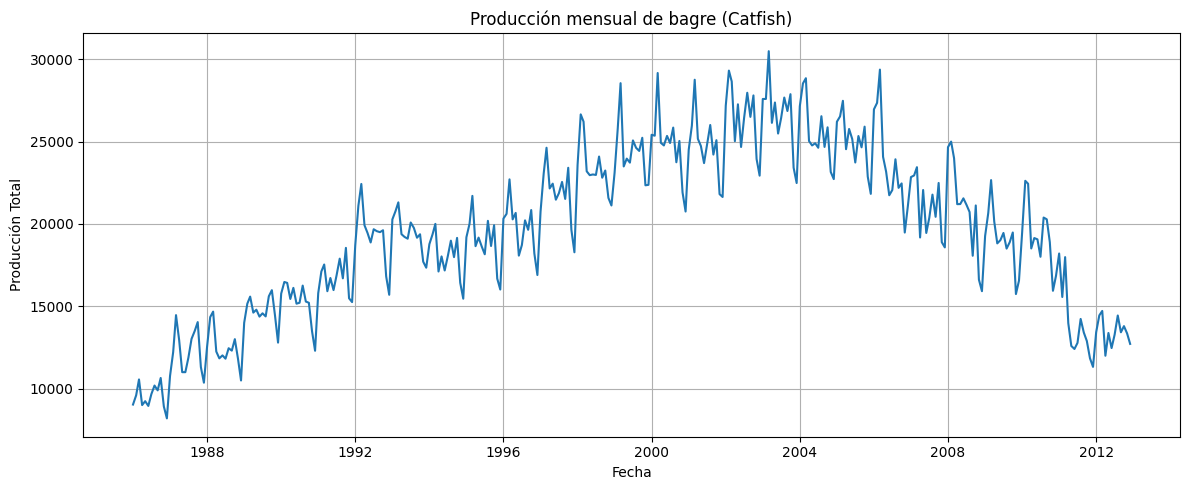

Estadísticos básicos:
count      324.000000
mean     19643.984568
std       5039.324331
min       8196.000000
25%      15764.000000
50%      19660.500000
75%      23604.500000
max      30485.000000
Name: Total, dtype: float64


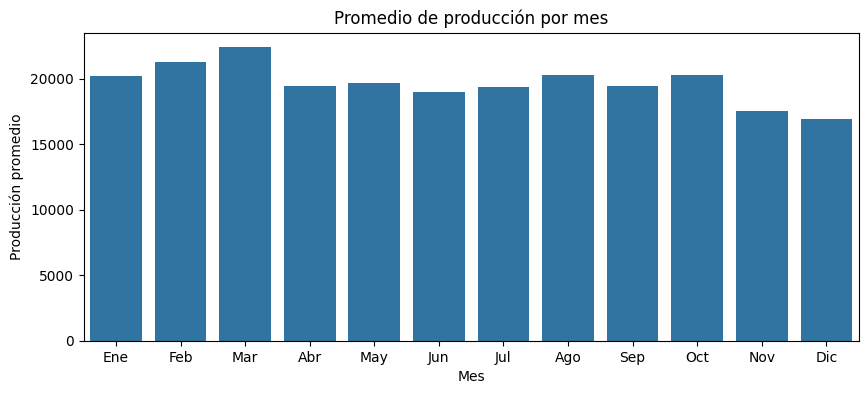

In [17]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x=df.index, y='Total')
plt.title('Producción mensual de bagre (Catfish)')
plt.xlabel('Fecha')
plt.ylabel('Producción Total')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Estadísticos básicos:")
print(df['Total'].describe())

# Estacionalidad rápida: promedio por mes
df['month'] = df.index.month
monthly_avg = df.groupby('month')['Total'].mean()

plt.figure(figsize=(10, 4))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title('Promedio de producción por mes')
plt.xlabel('Mes')
plt.ylabel('Producción promedio')
plt.xticks(range(0, 12), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
])
plt.show()


## Se procederá a una descomposición de la serie en componentes de tendencia, estacional y residual.

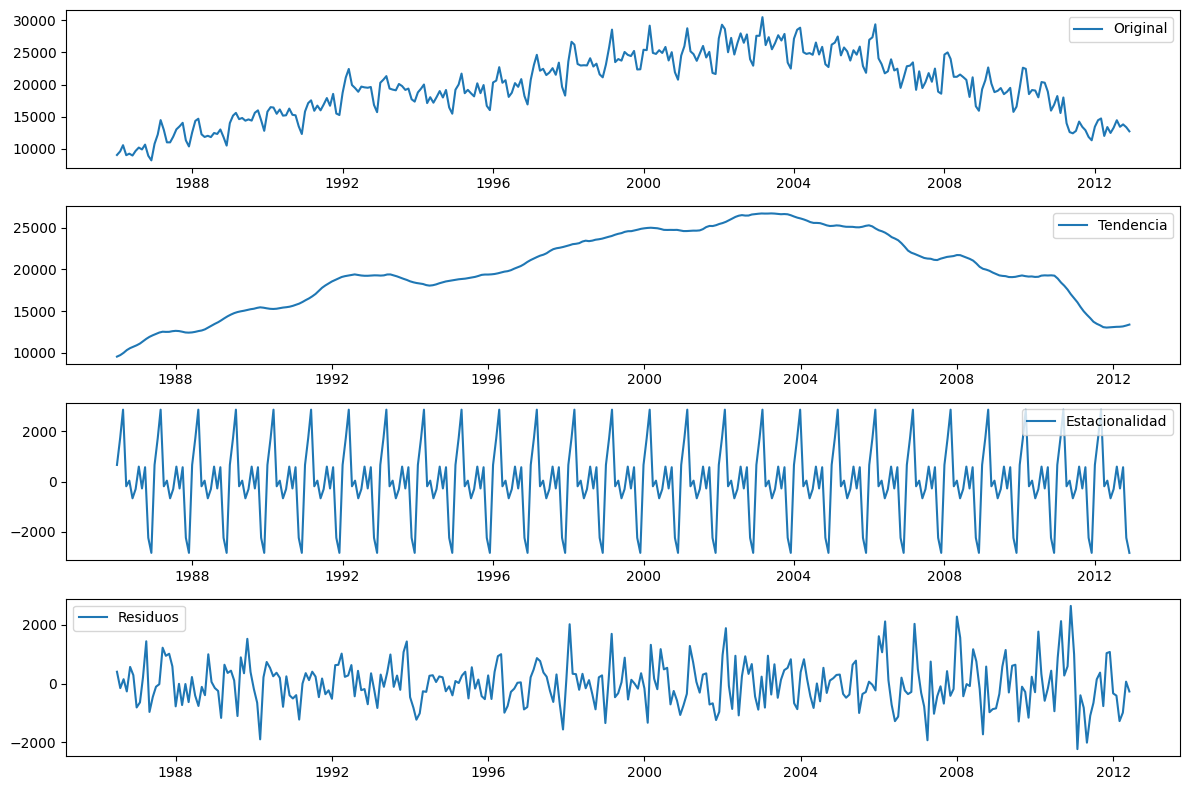

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

serie = df['Total'].astype(float)

decomposition = seasonal_decompose(serie, model='additive', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Gráficas de los componentes
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(serie, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuos')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## Aplicaremos el test ACF para comprobar la estacionaridad de la serie.

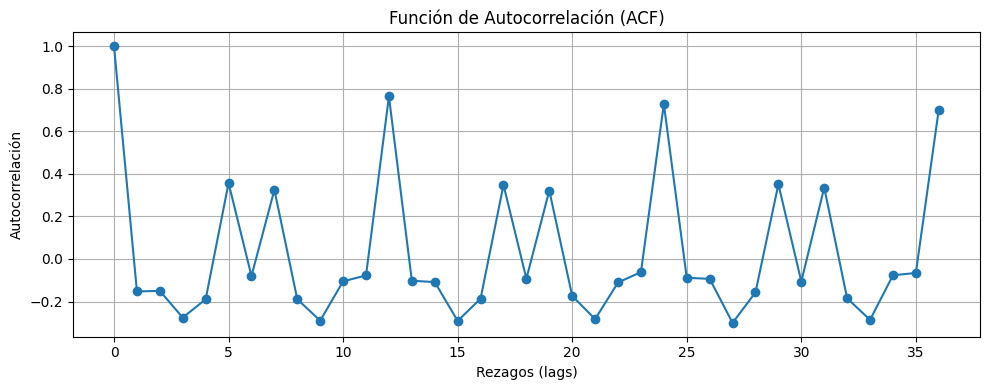

In [25]:
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt

# Serie diferenciada para hacerla más estacionaria
x_diff = df['Total'].diff().dropna()

# Calcular ACF con 36 retardos
lag_acf = acf(x_diff, nlags=36, fft=True)

# Graficar ACF
plt.figure(figsize=(10, 4))
plt.plot(lag_acf, marker='o')
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Rezagos (lags)')
plt.ylabel('Autocorrelación')
plt.grid(True)
plt.tight_layout()
plt.show()

## En caso de ser no estacionaria, aplicaremos algunas de las técnicas vistas en clase (por ejemplo, diferenciación).

Date
1986-01-01     9034
1986-02-01     9596
1986-03-01    10558
1986-04-01     9002
1986-05-01     9239
Freq: MS, Name: Total, dtype: int64
Date
1986-01-01        NaN
1986-02-01     9034.0
1986-03-01     9596.0
1986-04-01    10558.0
1986-05-01     9002.0
Freq: MS, Name: Total, dtype: float64
Date
1986-01-01       NaN
1986-02-01     562.0
1986-03-01     962.0
1986-04-01   -1556.0
1986-05-01     237.0
Freq: MS, Name: Total, dtype: float64


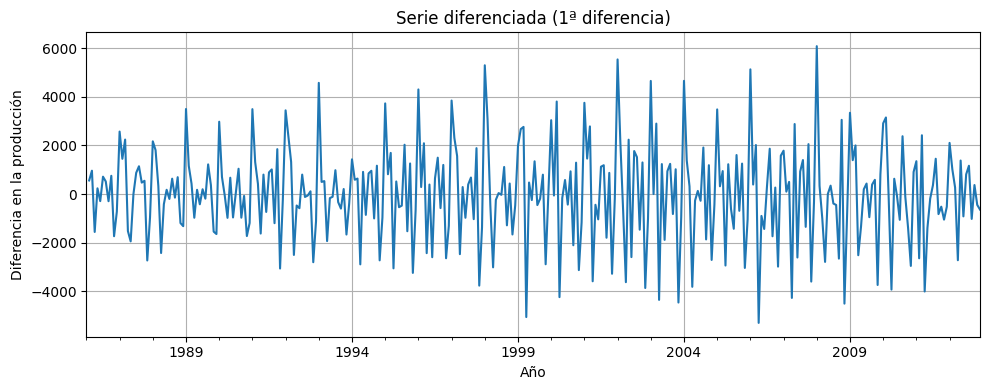

In [26]:
import numpy as np
import matplotlib.pyplot as plt

print(df['Total'].head())
print(df['Total'].shift().head())  # Serie desplazada (X_{t-1})
print(df['Total'].diff().head())   # Diferencias (X_t - X_{t-1})

assert np.all((df['Total'].diff() == df['Total'] - df['Total'].shift())[1:])

df['Total'].diff().plot(figsize=(10, 4))
plt.title('Serie diferenciada (1ª diferencia)')
plt.xlabel('Año')
plt.ylabel('Diferencia en la producción')
plt.grid(True)
plt.tight_layout()
plt.show()


## Representaremos los gráficos de autocorrelación y autocorrelación parcial.

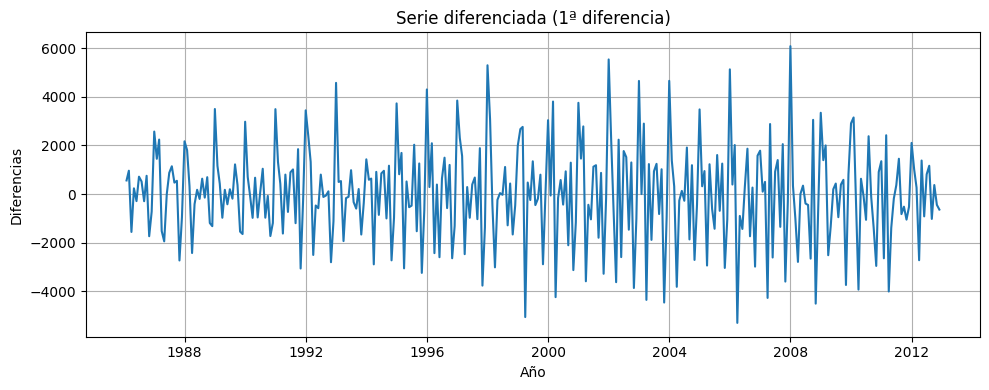

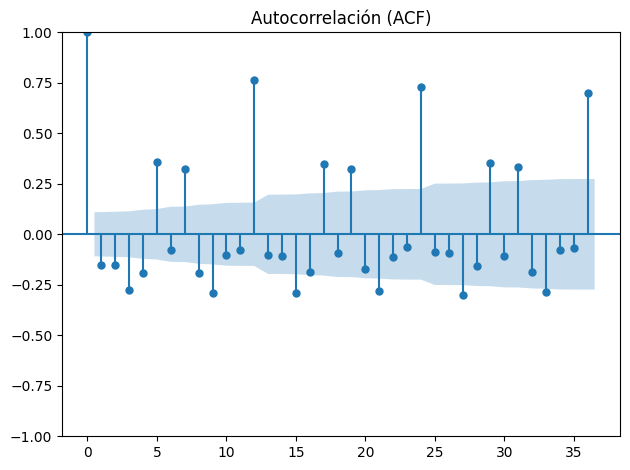

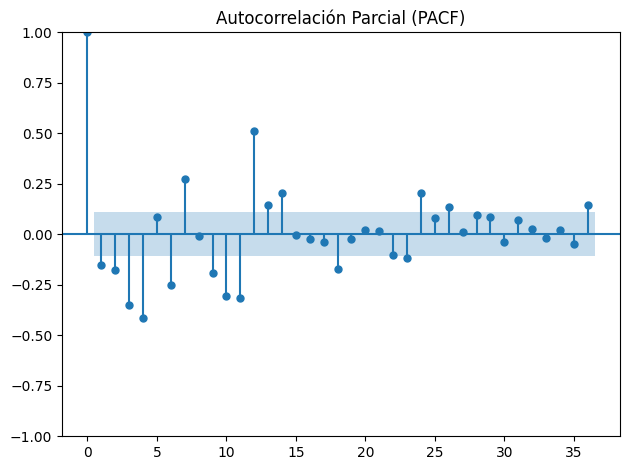

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Serie diferenciada (primera diferencia)
diff_series = df['Total'].diff().dropna()

plt.figure(figsize=(10, 4))
plt.plot(diff_series)
plt.title('Serie diferenciada (1ª diferencia)')
plt.xlabel('Año')
plt.ylabel('Diferencias')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico ACF
plot_acf(diff_series, lags=36)
plt.title('Autocorrelación (ACF)')
plt.tight_layout()
plt.show()

# Gráfico PACF
plot_pacf(diff_series, lags=36, method='ywm')
plt.title('Autocorrelación Parcial (PACF)')
plt.tight_layout()
plt.show()


## Una vez preprocesada, modelaremos la serie usando ARMA y SARIMA.


                                     SARIMAX Results                                      
Dep. Variable:                              Total   No. Observations:                  324
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2463.587
Date:                            Sun, 04 May 2025   AIC                           4937.174
Time:                                    14:48:14   BIC                           4955.643
Sample:                                01-01-1986   HQIC                          4944.568
                                     - 12-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1311      0.127      1.029      0.304      -0.119       0.381
ma.L1         -0.5396      0.112   

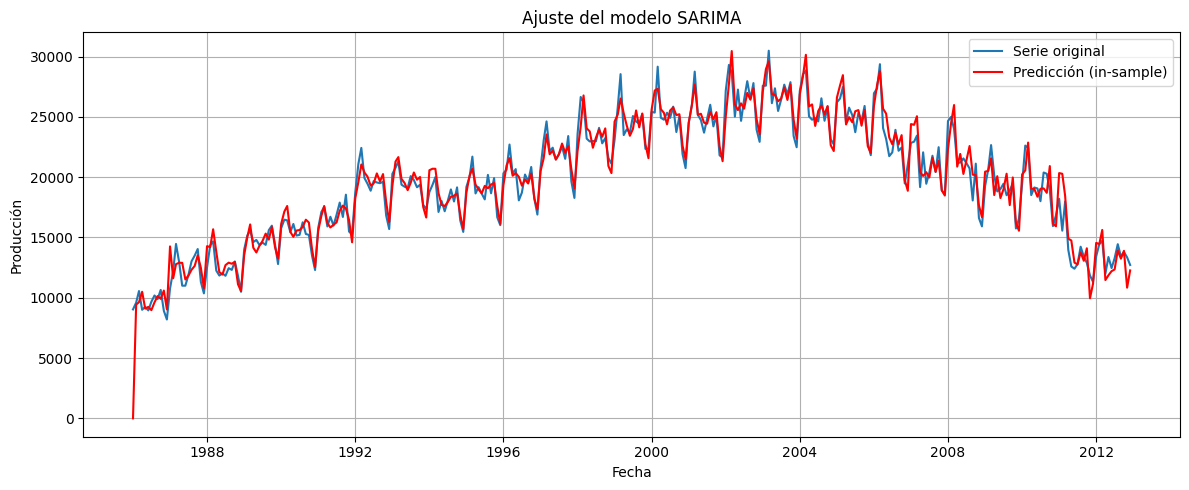

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

x = df["Total"].astype(float)

model = SARIMAX(x,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

print(results.summary())

pred = results.predict(start=0, end=len(x)-1, typ='levels')

# Gráfico
plt.figure(figsize=(12, 5))
plt.plot(x, label='Serie original')
plt.plot(pred, label='Predicción (in-sample)', color='red')
plt.title('Ajuste del modelo SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Producción')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Probaremos a utilizar el modelo SARIMA para predecir.

In [28]:
y = df['Total']

def sarima_grid_search(y, seasonal_period):
    import itertools
    import statsmodels.api as sm
    import warnings
    warnings.filterwarnings("ignore")

    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], seasonal_period) for x in pdq]

    mini = float('+inf')
    param_mini = None
    param_seasonal_mini = None

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit(disp=False)

                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

                print(f'SARIMA{param}x{param_seasonal} - AIC:{results.aic:.2f}')
            except:
                continue

    print('\nMejor modelo encontrado:')
    print(f'SARIMA{param_mini}x{param_seasonal_mini} - AIC:{mini:.2f}')

sarima_grid_search(y, 12)


SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:7326.01
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:6853.80
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:5637.77
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:5412.00
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:5657.55
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:5635.42
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:5429.77
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:5389.34
SARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:7074.68
SARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:6755.15
SARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:5439.74
SARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:5223.27
SARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:5478.42
SARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:5443.68
SARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:5256.52
SARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:5222.40
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:5794.63
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:5446.49
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:5338.15
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:4993.76
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:5320.23
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:5203.62
SARIMA(0, 1, 0)x(1, 1, 0, 12) - 